<a href="https://colab.research.google.com/github/RojTanakorn/Deep-Learning-Practice/blob/master/Dropout_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import tensorflow.keras as kr
import matplotlib.pyplot as plt

**Load Data**

In [5]:
(X_train, y_train), (X_valid, y_valid) = kr.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [6]:
print(X_train.shape)
print(X_valid.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**Flatten data by .reshape**

In [0]:
X_train = X_train.reshape(50000, 32*32*3).astype('float32')
X_valid = X_valid.reshape(10000, 32*32*3).astype('float32')

In [8]:
print(X_train.shape)
print(X_valid.shape)

(50000, 3072)
(10000, 3072)


**Normalization**

In [0]:
X_train /= 255
X_valid /= 255

In [10]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


**Make Label with One Hot Vector**

In [0]:
n_classes = 10
y_train = kr.utils.to_categorical(y_train, n_classes)
y_valid = kr.utils.to_categorical(y_valid, n_classes)

In [12]:
print(y_train.shape)
print(y_train[0]) # 6

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Create 1st Model**

In [0]:
model =  kr.models.Sequential()
model.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model.add(kr.layers.Dense(128, activation = 'relu'))
model.add(kr.layers.Dense(128, activation = 'relu'))
model.add(kr.layers.Dense(128, activation = 'relu'))
model.add(kr.layers.Dense(128, activation = 'relu'))

model.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 1st Model**

In [15]:
import time
start = time.time()
his = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp = time.time()
time_used = stamp-start

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 105us/sample - loss: 1.9723 - accuracy: 0.2795 - val_loss: 1.7856 - val_accuracy: 0.3538
Epoch 2/20
50000/50000 [==============================] - 5s 92us/sample - loss: 1.7483 - accuracy: 0.3700 - val_loss: 2.6471 - val_accuracy: 0.2108
Epoch 3/20
50000/50000 [==============================] - 5s 92us/sample - loss: 1.6507 - accuracy: 0.4064 - val_loss: 1.7052 - val_accuracy: 0.3730
Epoch 4/20
50000/50000 [==============================] - 5s 93us/sample - loss: 1.5839 - accuracy: 0.4317 - val_loss: 1.6154 - val_accuracy: 0.4178
Epoch 5/20
50000/50000 [==============================] - 5s 94us/sample - loss: 1.5410 - accuracy: 0.4475 - val_loss: 1.5942 - val_accuracy: 0.4459
Epoch 6/20
50000/50000 [==============================] - 5s 96us/sample - loss: 1.4987 - accuracy: 0.4659 - val_loss: 1.5985 - val_accuracy: 0.4367
Epoch 7/20
50000/50000 [==============================]

In [16]:
time_used

94.45300340652466

**Display result of 1st model**

In [17]:
his.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

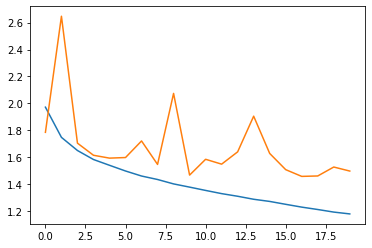

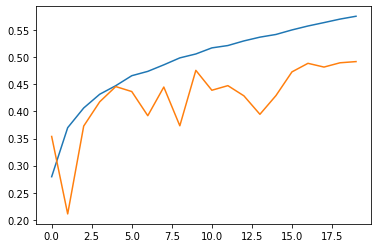

In [18]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.show()

from graphs show that there are overfitting
- it's fit when epochs = 2 but, loss is too high

In [19]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 1s 57us/sample - loss: 1.4982 - accuracy: 0.4920


[1.4982074226379394, 0.492]

**Using Regularization (L2) - Create 2nd Model**

In [0]:
model_l2 =  kr.models.Sequential()
model_l2.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01))) #decay
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))

model_l2.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model_l2.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 2nd Model**

In [22]:
start2 = time.time()
his_l2 = model_l2.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp2 = time.time()
time_used2 = stamp2-start2

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 106us/sample - loss: 4.6512 - accuracy: 0.2555 - val_loss: 3.1924 - val_accuracy: 0.2314
Epoch 2/20
50000/50000 [==============================] - 5s 98us/sample - loss: 2.5319 - accuracy: 0.3118 - val_loss: 2.3096 - val_accuracy: 0.2515
Epoch 3/20
50000/50000 [==============================] - 5s 99us/sample - loss: 2.0730 - accuracy: 0.3293 - val_loss: 1.9971 - val_accuracy: 0.3209
Epoch 4/20
50000/50000 [==============================] - 5s 98us/sample - loss: 1.9510 - accuracy: 0.3432 - val_loss: 2.0460 - val_accuracy: 0.2858
Epoch 5/20
50000/50000 [==============================] - 5s 97us/sample - loss: 1.9042 - accuracy: 0.3504 - val_loss: 1.8754 - val_accuracy: 0.3554
Epoch 6/20
50000/50000 [==============================] - 5s 97us/sample - loss: 1.8766 - accuracy: 0.3608 - val_loss: 2.0319 - val_accuracy: 0.3219
Epoch 7/20
50000/50000 [==============================]

In [23]:
time_used2

95.4745819568634

Slower than normal model because it needs to calculate decay.

Regularization will make model learning slower.
Nowadays, people frequently use **Batch Normalization**.

**Display Result of 2nd Model**

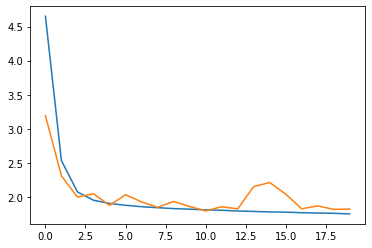

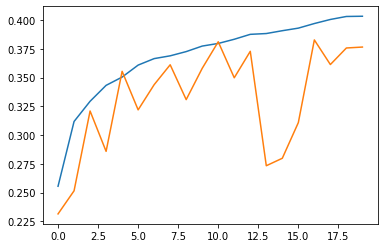

In [24]:
plt.plot(his_l2.history['loss'])
plt.plot(his_l2.history['val_loss'])
plt.show()
plt.plot(his_l2.history['accuracy'])
plt.plot(his_l2.history['val_accuracy'])
plt.show()

from loss graph, it shows characteristics of train and valid are similar.


---

** That's fix overfitting problem.

In [25]:
model_l2.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 1s 60us/sample - loss: 1.8218 - accuracy: 0.3765


[1.8217678495407104, 0.3765]

**Try to use Dropout!**

In [0]:
model_dropout =  kr.models.Sequential()
model_dropout.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dropout(0.5))
model_dropout.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model_dropout.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 3rd Model**

In [28]:
start3 = time.time()
his_dropout = model_dropout.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp3 = time.time()
time_used3 = stamp3-start3

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 103us/sample - loss: 2.0459 - accuracy: 0.2402 - val_loss: 1.9025 - val_accuracy: 0.3141
Epoch 2/20
50000/50000 [==============================] - 5s 94us/sample - loss: 1.8628 - accuracy: 0.3231 - val_loss: 1.7355 - val_accuracy: 0.3858
Epoch 3/20
50000/50000 [==============================] - 5s 95us/sample - loss: 1.7649 - accuracy: 0.3652 - val_loss: 1.6480 - val_accuracy: 0.4102
Epoch 4/20
50000/50000 [==============================] - 5s 96us/sample - loss: 1.7024 - accuracy: 0.3894 - val_loss: 1.9112 - val_accuracy: 0.3282
Epoch 5/20
50000/50000 [==============================] - 5s 97us/sample - loss: 1.6528 - accuracy: 0.4069 - val_loss: 1.8980 - val_accuracy: 0.3391
Epoch 6/20
50000/50000 [==============================] - 5s 96us/sample - loss: 1.6188 - accuracy: 0.4222 - val_loss: 2.1408 - val_accuracy: 0.2839
Epoch 7/20
50000/50000 [==============================]

In [29]:
time_used3

95.34357452392578

It's usually faster than normal model because Dropout cuts some nodes out.

**Display Result of 3rd Model**

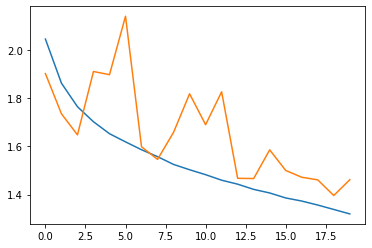

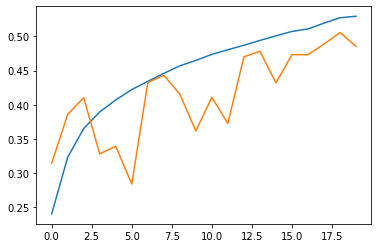

In [30]:
plt.plot(his_dropout.history['loss'])
plt.plot(his_dropout.history['val_loss'])
plt.show()
plt.plot(his_dropout.history['accuracy'])
plt.plot(his_dropout.history['val_accuracy'])
plt.show()

Dropout can reduce overfitting too.

In [31]:
model_dropout.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 1s 58us/sample - loss: 1.4616 - accuracy: 0.4852


[1.4616110593795777, 0.4852]

**Let's try both of Regularization and Dropout**

In [0]:
model_both =  kr.models.Sequential()
model_both.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01))) #decay
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))

model_both.add(kr.layers.Dropout(0.5))
model_both.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model_both.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 4th Model**

In [34]:
start4 = time.time()
his_both = model_both.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp4 = time.time()
time_used4 = stamp4-start4

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 103us/sample - loss: 4.7395 - accuracy: 0.2013 - val_loss: 3.1509 - val_accuracy: 0.2451
Epoch 2/20
50000/50000 [==============================] - 5s 91us/sample - loss: 2.5955 - accuracy: 0.2587 - val_loss: 2.2215 - val_accuracy: 0.2789
Epoch 3/20
50000/50000 [==============================] - 5s 93us/sample - loss: 2.1350 - accuracy: 0.2763 - val_loss: 2.0317 - val_accuracy: 0.2955
Epoch 4/20
50000/50000 [==============================] - 5s 91us/sample - loss: 2.0154 - accuracy: 0.2854 - val_loss: 2.0570 - val_accuracy: 0.2788
Epoch 5/20
50000/50000 [==============================] - 5s 93us/sample - loss: 1.9827 - accuracy: 0.2876 - val_loss: 1.9485 - val_accuracy: 0.2895
Epoch 6/20
50000/50000 [==============================] - 5s 91us/sample - loss: 1.9675 - accuracy: 0.2914 - val_loss: 2.0251 - val_accuracy: 0.2594
Epoch 7/20
50000/50000 [==============================]

In [35]:
time_used4

93.08263278007507

**Display Result of 4th Model**

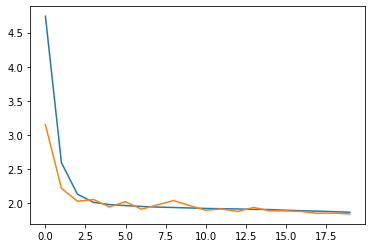

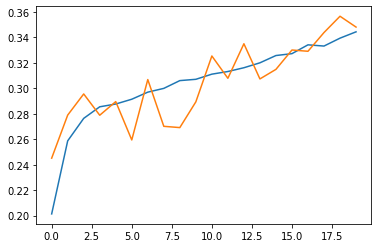

In [36]:
plt.plot(his_both.history['loss'])
plt.plot(his_both.history['val_loss'])
plt.show()
plt.plot(his_both.history['accuracy'])
plt.plot(his_both.history['val_accuracy'])
plt.show()

Normally, we have to tune hyperparameters for the best result.